In [3]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt

In [4]:
class eEuler:
    def __init__(self, fun, t, Y0, steps):
        self.fun = fun
        self.t = t
        self.Y0 = Y0
        self.steps = steps
        self.tau = (t[1] - t[0]) / steps
        self.t_list = np.linspace(t[0], t[1], steps + 1)

    def call(self):
        Y = self.Y0
        Y_list = [Y]
        for i in range(self.steps):
            Y = Y + self.tau * self.fun(self.t_list[i], Y)
            Y_list.append(Y)
        return np.array(Y_list)

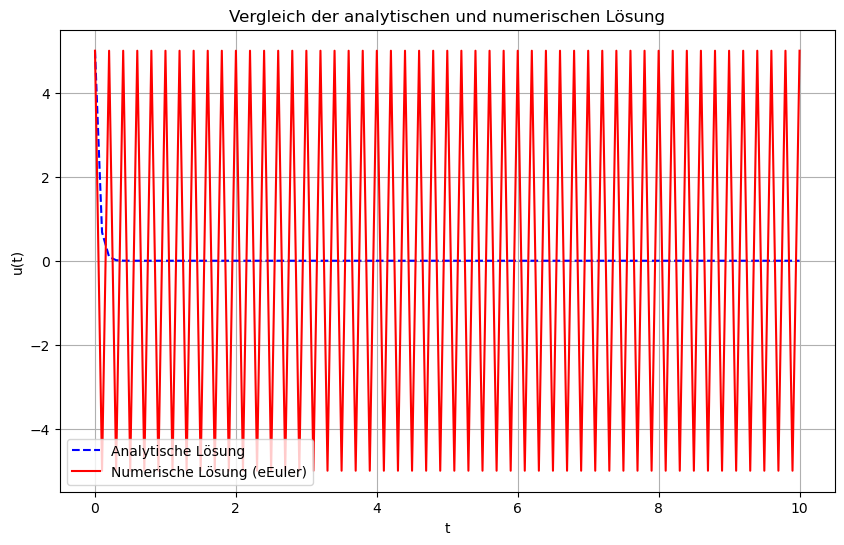

In [5]:
def fun(t, u):
    return -20 * u

# Analytische Lösung
def analytical_solution(t):
    return 5 * np.exp(-20 * t)


# Parameter
N = 10
T_INTERVAL = [0, N]  

u0 = 5  # Anfangswert
steps = 100  # Anzahl der Schritte

solver = eEuler(fun, T_INTERVAL, u0, steps)
numerical_solution = solver.call()
T_LIST = np.linspace(T_INTERVAL[0], T_INTERVAL[1], steps + 1)
analytical_values = analytical_solution(T_LIST)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(T_LIST, analytical_values, label="Analytische Lösung", linestyle="--", color="blue")
plt.plot(T_LIST, numerical_solution, label="Numerische Lösung (eEuler)", linestyle="-", color="red")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.title("Vergleich der analytischen und numerischen Lösung")
plt.legend()
plt.grid()
plt.show()
